In [ ]:
#tell the G is bipartite or not

import networkx as nx
G = nx.read_edgelist('/content/edgelisttest.txt', nodetype=int)
print(G.number_of_nodes(), G.number_of_edges())
nx.is_bipartite(G)

In [ ]:
# Define a function to find matching pairs between two lists
def find_matching_pairs(list1, list2):
    # Find all elements in list1 that are also in list2 and collect them as tuples
    pairs = [(element, element) for element in list1 if element in list2]
    return pairs

# Example lists
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]

# Function call commented out to prevent execution
find_matching_pairs(top_nodes, bottom_nodes)


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def get_nodelists(edgelist_file):
  edge_list_file = (edgelist_file)
  edges = []
  top_nodes = []
  bottom_nodes =[]
  with open(edge_list_file, 'r', encoding='utf-8') as file:
    for line in file:
      templist = line.strip().split()
      if templist:
        try:
         node1, node2 = templist[0], templist[1] # Assuming a space separates the node identifiers
         edges.append((node1, node2))
         top_nodes.append(node1)
         bottom_nodes.append(node2)
        except IndexError:
          None

  return edges, top_nodes, bottom_nodes






In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Read the edge list from the file and divide imported edgelist into top-node list and bottom-node list
edge_list_file = "/content/edgelisttest.txt"  # Update this path
edges = []
top_nodes = []
bottom_nodes = []
with open(edge_list_file, 'r', encoding='utf-8') as file:
    for line in file:
      templist = line.strip().split()
      if templist:
        try:
         node1, node2 = templist[0], templist[1] # Assuming a space separates the node identifiers
         edges.append((node1, node2))
         top_nodes.append(node1)
         bottom_nodes.append(node2)
        except IndexError:
          None

# Step 2: Create a bipartite graph
B = nx.Graph()
B.add_edges_from(edges)
# If you know the nodes in each set, you can specify them using B.add_nodes_from(node_list, bipartite=0 or 1)

# Step 3: Visualize the graph
pos1 = nx.bipartite_layout(B, nodes=top_nodes)
pos = nx.bipartite_layout(B, nodes=[node for node, degree in B.degree() if degree == 1])
nx.draw(B, pos1, with_labels=True)
plt.show()


bottomdict = dict.fromkeys(bottom_nodes)
ndl = [key for key in bottomdict]
#print(all the bottom nodes)
nodes=[node for node, degree in B.degree() if degree == 1]
def bipartite_projection(Graph, nodes):
  PB = nx.bipartite.projected_graph(Graph, nodes)
  return PB

bottomdict = dict.fromkeys(top_nodes)
ndl = [key for key in bottomdict] #print all top nodes

projected = nx.bipartite.projected_graph(B, ndl, multigraph = False)
pos = nx.random_layout(projected)

#nx.draw(projected, pos, with_labels=True)

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(projected, pos, node_size=100)
nx.draw_networkx_labels(projected, pos, font_size=10)
nx.draw_networkx_edges(projected, pos, edge_color="grey", width=0.5)
plt.show()

1363
232


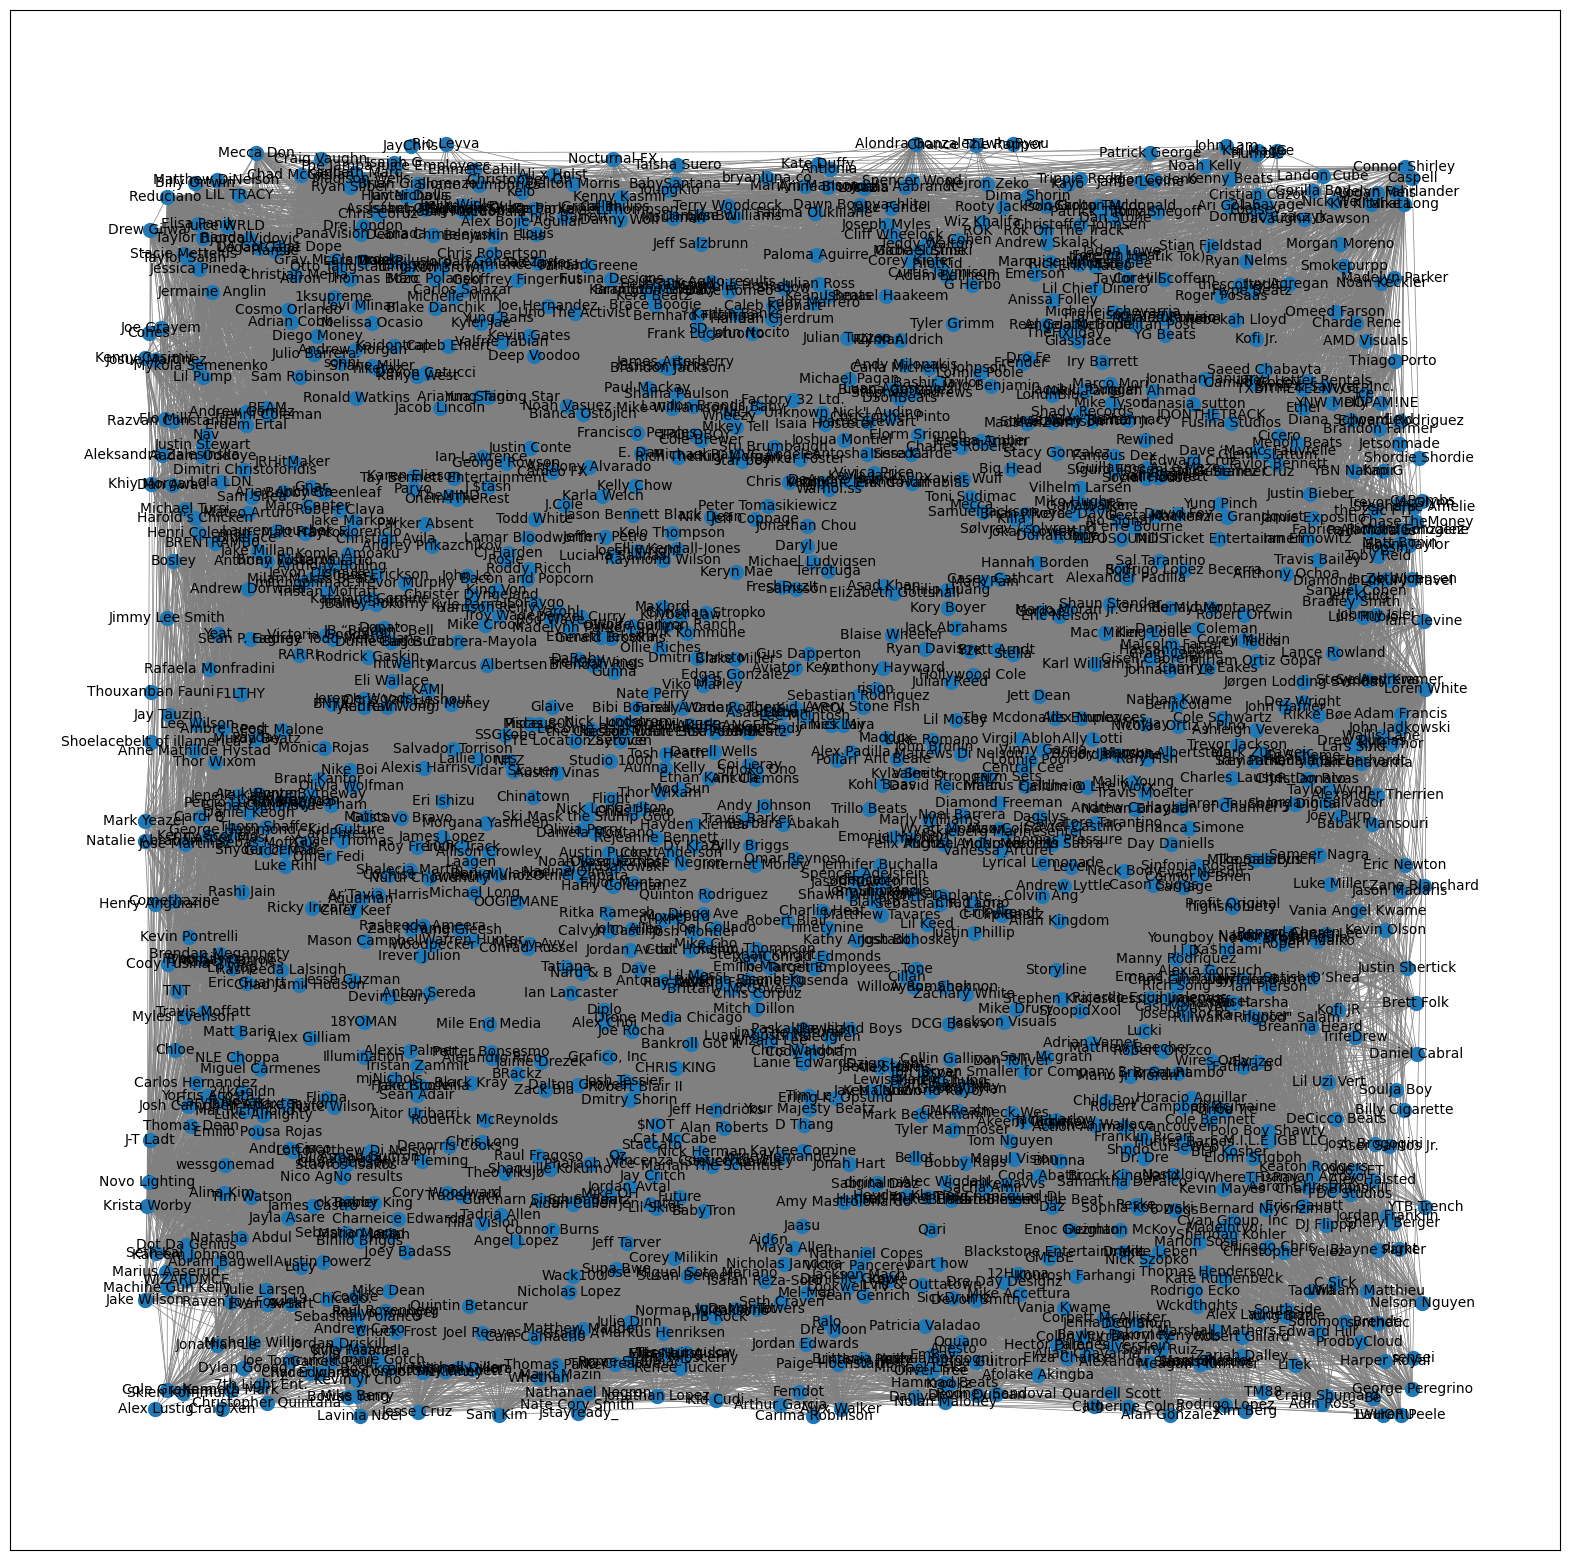

In [2]:
import pandas as pd

df = pd.read_csv("/content/artistsnodelist.csv", header=0, names=["Id", "Label", "Based"], usecols=[0,1,3])
ids = df["Id"]
artist_name = df["Label"]
artist_base = df["Based"]

bottomdict = dict.fromkeys(top_nodes)
ndl = [key for key in bottomdict] #artistnodes
print(len(ndl))
top_dict = dict.fromkeys(bottom_nodes)
ndl2 = [key for key in top_dict] #trucknodes
print(len(ndl2))

id_label_dict = df.set_index("Id")["Label"].to_dict() #include tracknode

for i in range(len(ndl2)):
  id_label_dict.pop(int(ndl2[i])) #remove tracknodes from artistnodes


# Convert dictionary keys from int to str
def convert_keys_to_str(id_label_dict):
    # Convert keys to str using dictionary comprehension
    id_label_dict_str = {str(key): value for key, value in id_label_dict.items()}
    return id_label_dict_str

# Function call commented out to prevent execution
# Example usage (commented):
mapping_dict = convert_keys_to_str(id_label_dict)
mapping_dict2 = {k: v for k, v in mapping_dict.items() if not pd.isna(v)}

relabeled_PG = nx.relabel_nodes(projected, mapping_dict2)
pos = nx.random_layout(relabeled_PG)

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(relabeled_PG, pos, node_size=100)
nx.draw_networkx_labels(relabeled_PG, pos, font_size=10)
nx.draw_networkx_edges(relabeled_PG, pos, edge_color="grey", width=0.5)
plt.show()


In [3]:
import pandas as pd

# CSVファイルの読み込み（ファイルパスや列名は適宜調整してください）
df = pd.read_csv("/content/artistsnodelist.csv", header=0, names=["Id", "Label", "artists", "Basedlist"], usecols=[0, 1, 4, 5])

# DataFrameから必要なデータを抽出
ids = df["Id"]
artist_name = df["artists"]
artist_base = df["Basedlist"]

# artistnodesとtracknodesのための辞書の初期化（top_nodesとbottom_nodesは定義されている必要がある）
bottomdict = dict.fromkeys(top_nodes)
ndl = [key for key in bottomdict]  # artistnodes

top_dict = dict.fromkeys(bottom_nodes)
ndl2 = [key for key in top_dict]  # tracknodes

# IdをインデックスとしてLabelを辞書にする
id_label_dict = df.set_index("Id")["Label"].to_dict()

# tracknodesの削除
for i in ndl2:
    id_label_dict.pop(int(i), None)  # popにNoneを追加して、キーがない場合のエラーを防ぐ

# NaNを含まないエントリのみを保持
id_label_dict = {k: v for k, v in id_label_dict.items() if not pd.isna(v)}

# 出力
print(id_label_dict)

# artist_keyとartist_basedのリストを作成
artist_key = list(id_label_dict.values())
artist_based = list(df["Basedlist"])

# artist-based dictionaryの作成
artist_based_dict = dict(zip(artist_key, artist_based))
print(artist_based_dict.keys())


In [5]:
from scipy.stats import entropy
import numpy as np
import collections

communities = nx.community.louvain_communities(relabeled_PG)
community_list = []
for i in range(len(communities)):
  templist = list(communities[i])
  community_list.append(templist)
print(community_list[3])
npd_keylist = list(artist_based_dict.keys())
dictionary = artist_based_dict
dictionary["SSGKobe"] = "S"
dictionary['Jaasu'] = "NE"
dictionary['Seth Kai'] = "No results"
dictionary['Kate Duffy'] = "No results"
print(dictionary)

def replace_elements_recursive(list1, keys_list, dictionary):
    key_set = set(keys_list)

    # 再帰的にリストの要素を辞書の値で置き換える処理
    def replace_recursive(item):
        if isinstance(item, list):
            return [replace_recursive(subitem) for subitem in item]
        elif item in key_set:
            return dictionary[item]
        else:
            return item

    return replace_recursive(list1)


clustring_result = replace_elements_recursive(community_list, npd_keylist, dictionary)
#print(clustring_result[9])

for i in range(len(clustring_result)):
  while "No results" in clustring_result[i]:
   clustring_result[i].remove("No results")

#print(clustring_result[7])

def inspect_entropy(cluster):
  count_list = np.array(cluster)
  ent = entropy(count_list, base=2)

  return ent

entropy_list = []
for j in range(len(clustring_result)):
  c = collections.Counter(clustring_result[j])
  freqlist = list(c.values())
  entr = inspect_entropy(freqlist)
  entropy_list.append(entr)
  plt.title(f"Cluster {j + 1}")
  plt.hist(clustring_result[j])
  plt.show()



print(entropy_list)


In [ ]:
print(clustring_result[1])
print(community_list[1])

['UK', 'UK', 'UK', 'UK', 'W/NE', 'S', 'UK', 'UK', 'UK', 'W/S', 'MW', 'CAN', 'UK', 'CAN', 'CAN', 'W', 'UK', 'NE', 'W', 'UK', 'UK', 'UK', 'CHE', 'CAN', 'NE', 'NE', 'UK', 'UK', 'CAN', 'CAN', 'UK', 'MW', 'UK', 'S', 'KR', 'UK', 'W', 'UK', 'NE', 'W', 'UK', 'CAN', 'UK', 'UK', 'UK']
['Matthew Tavares', 'Craig Capone', 'Barbara Abakah', 'Marcus Albertsen', 'Casper Masi', 'Ollie Riches', 'Pisceus', 'Alex Bojic-Aguilar', 'Fatima Ouklilane', 'Aleksandra Zalesinska', 'Nathan Kwame', 'Emmet Cahill', 'Sarah Marcoe', 'Kofi JR', 'Callum @ Lite Worx', 'Tadiwa', 'LiTek', 'Daz', 'Goood Dylan', 'Factory 32 Ltd.', 'Novo Lighting ', 'Kofi Jr.', 'Lindsey Reilly', 'Diamond Luxury Travel', 'Olivia Wolfman', 'Tosh Heath', 'Ryan Nelms', 'WhyJay', 'Toby Reid', 'Satish O’Shea', 'Lewis Martin', 'Jack Harlow', 'Shaun Stander', 'Keryn Mae', 'Moutman', 'Conrad Russel', 'TNG Creative', 'Harry Coleman', 'Aid6n', 'Mike Drury', 'Mile End Media', 'Trevor Murphy', 'Cole Graham', 'Mark Pain', 'George Rowson', 'Johnny Islei', 

In [7]:
x = nx.read_graphml("/content/before_soundcloud_2.graphml")
#nx.draw(x)

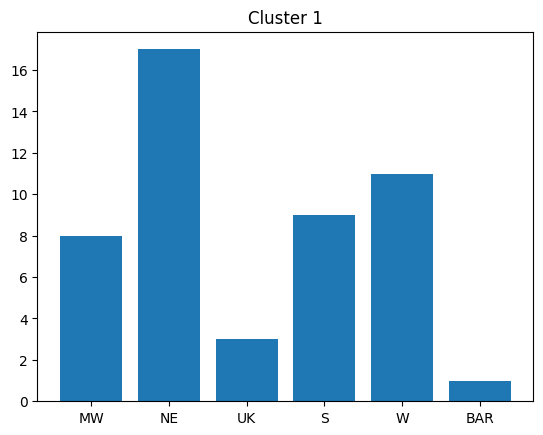

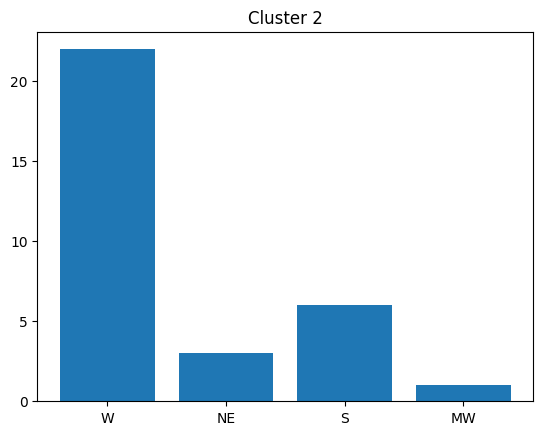

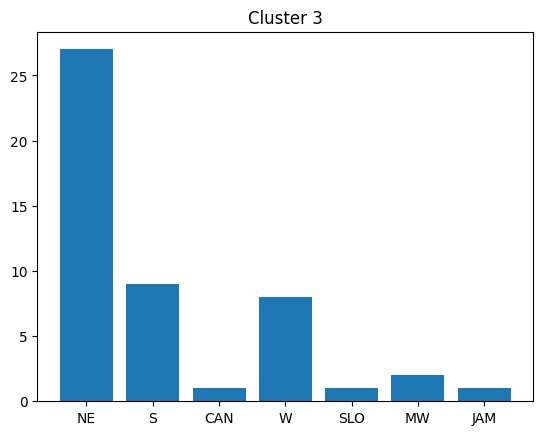

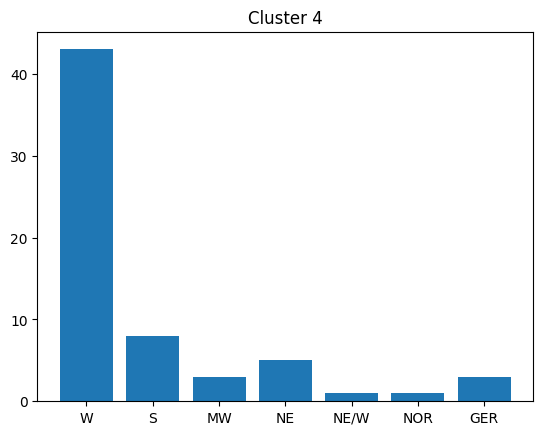

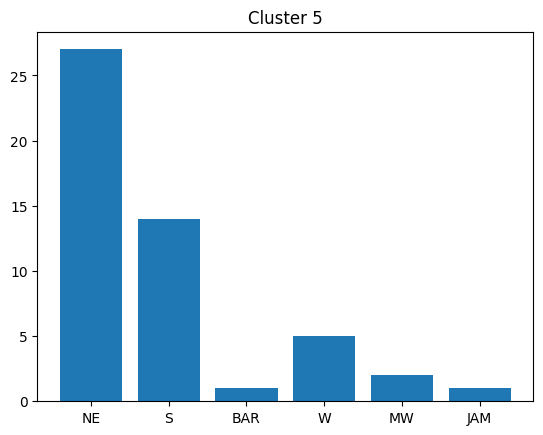

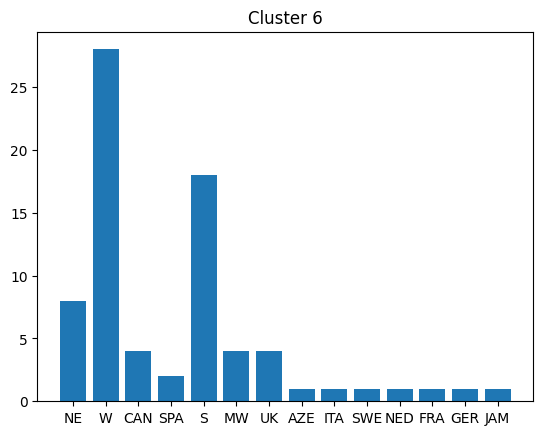

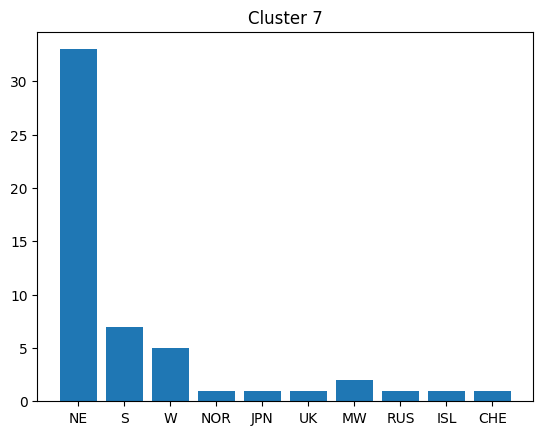

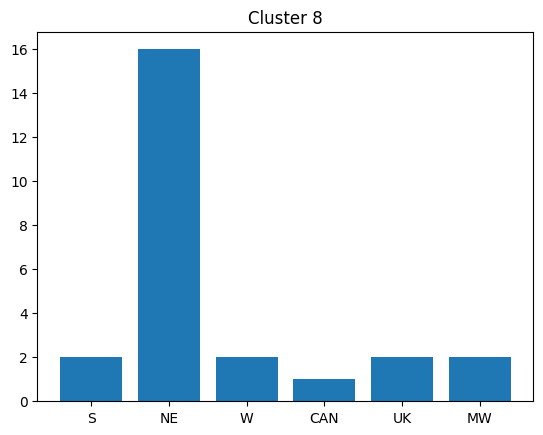

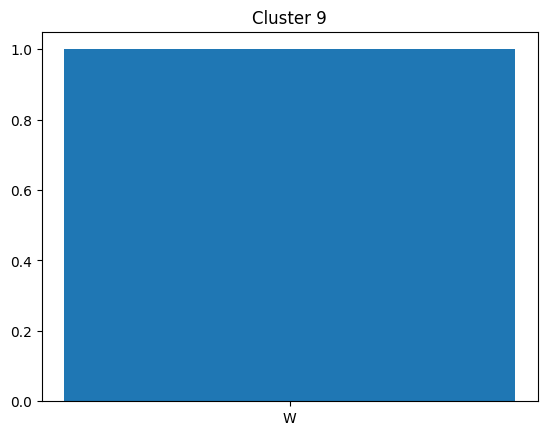

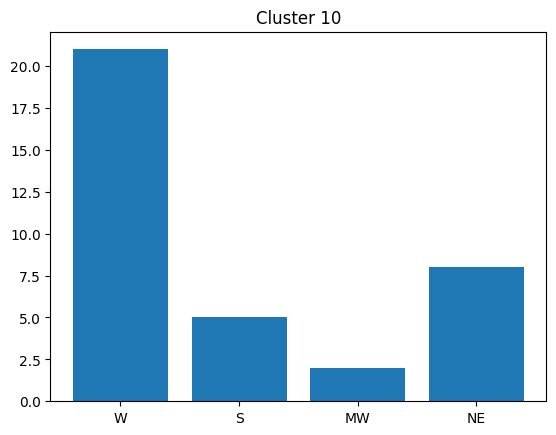

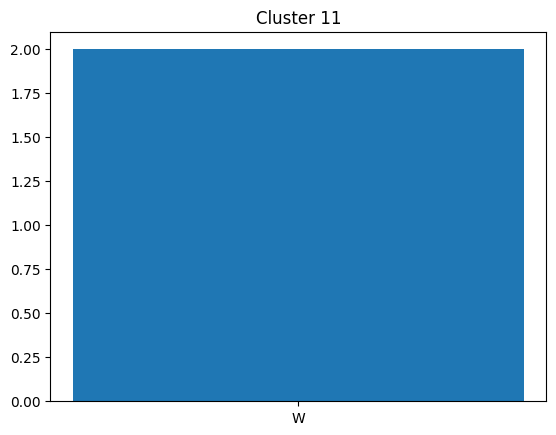

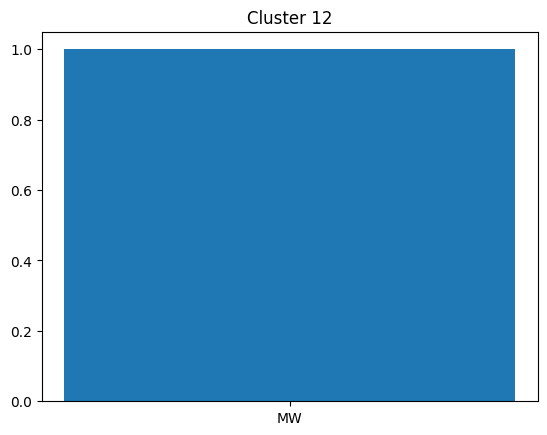

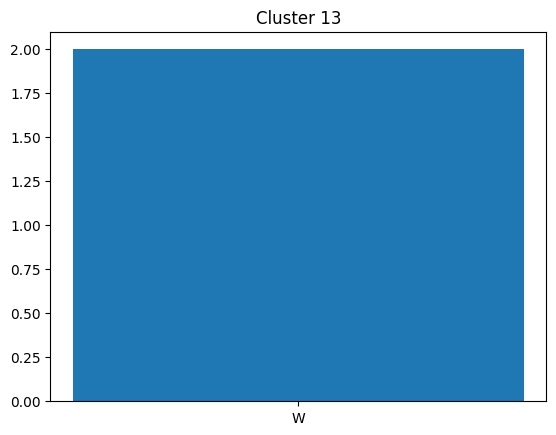

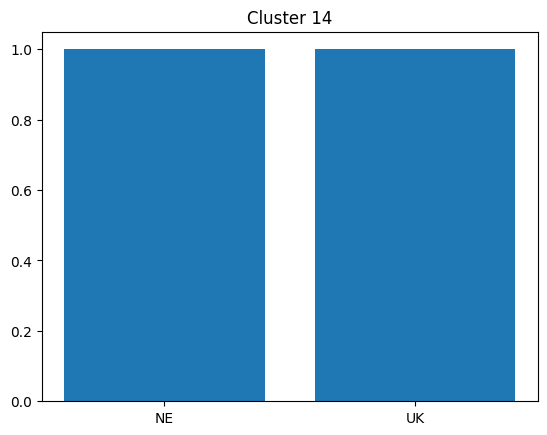

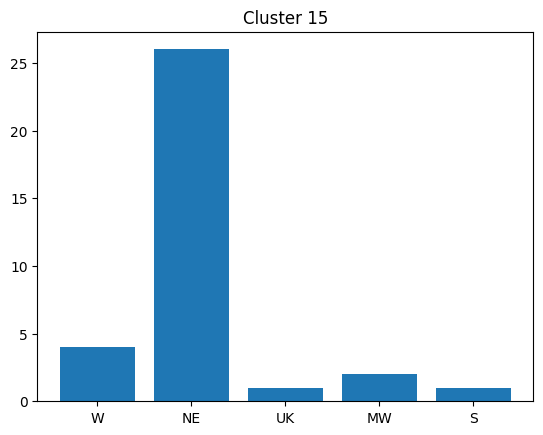

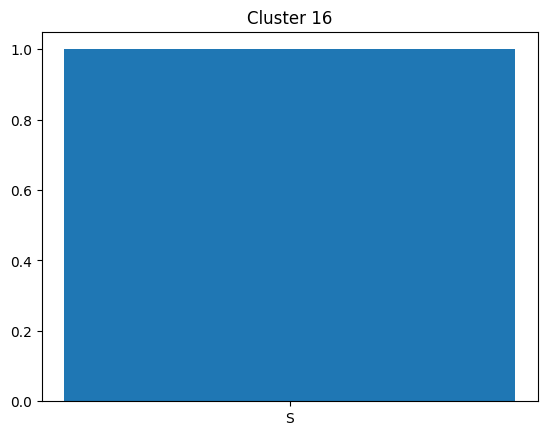

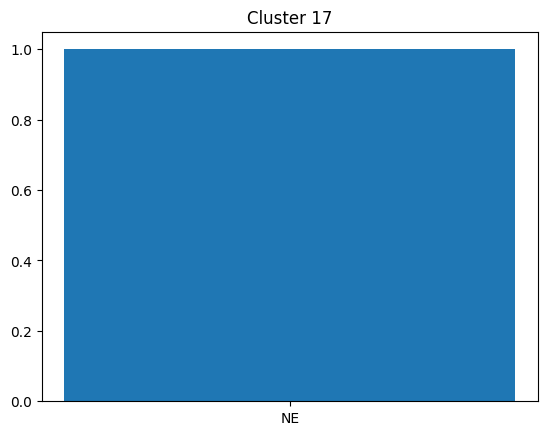

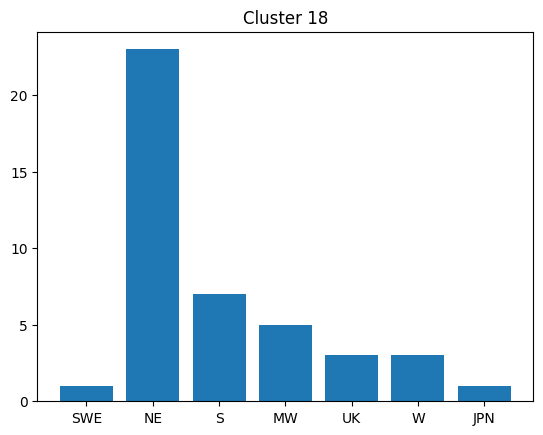

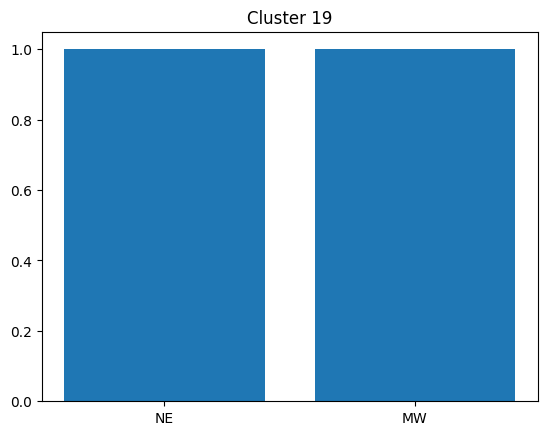

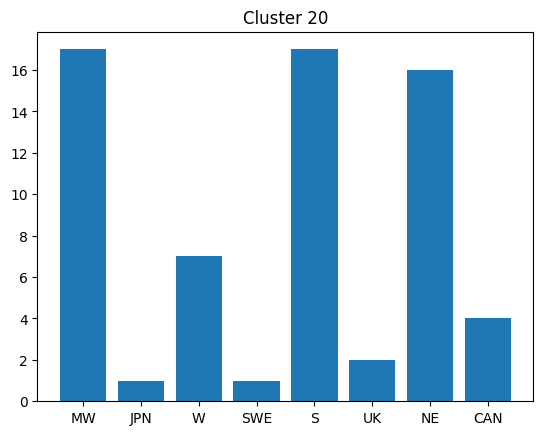

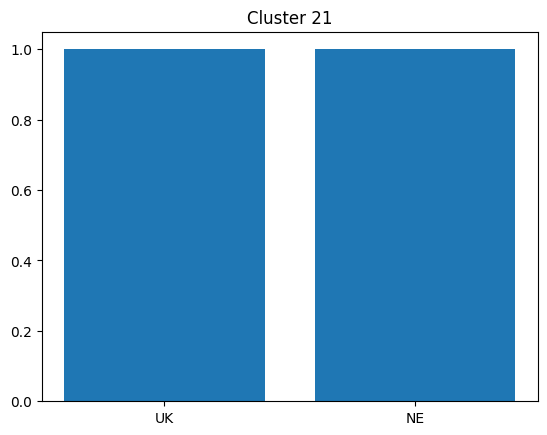

In [15]:
import matplotlib.pyplot as plt


communities2 = nx.community.louvain_communities(x)
community_list2 = []
for i in range(len(communities2)):
  templist = list(communities2[i])
  community_list2.append(templist)
print(community_list2[5])
print(community_list2[6])

df2 = pd.read_csv("/content/before_soundcloud_list.csv", header=0, names=["unique_elements", "Based"], usecols=[0,1])

artist_key2 = list(df2["unique_elements"])
artist_based2 = list(df2["Based"])

artist_based_dict2 = dict(zip(artist_key2, artist_based2))
print(artist_based_dict2)

clustring_result2 = replace_elements_recursive(community_list2, artist_key2, artist_based_dict2)
for i in range(len(clustring_result2)):
  while "No results" in clustring_result2[i]:
   clustring_result2[i].remove("No results")
print(clustring_result2)

entropy_list2 = []
for j in range(len(clustring_result2)):
  c2 = collections.Counter(clustring_result2[j])
  freqlist2 = list(c2.values())
  entr2 = inspect_entropy(freqlist2)
  entropy_list2.append(entr2)
  plt.title(f"Cluster {j + 1}")
  plt.bar(c2.keys(), c2.values())
  plt.show()

print(entropy_list2)

[2.6943753350542092, 2.5490786928606504, 2.495300781475361, 2.466531097629101, 2.2796799178059666, 2.2416212312639763, 2.22843655222138, 2.096726581361972, 1.5709505944546687, 0.0]
[2.7666241859148872, 2.457570214138222, 2.1429571955629867, 2.13949847547538, 2.0325497150415965, 2.0088721939159435, 1.763856189774725, 1.6662204435717949, 1.6031181730958226, 1.5630276027536796, 1.497936135778799, 1.300870058859033, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


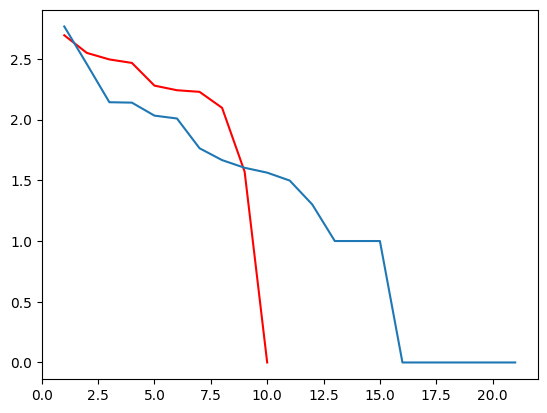

In [18]:
def ID_gen(entropylist):
 num = len(entropylist)

 cluster_ID = [i+1 for i in range(num)]


 return cluster_ID

cluster_ID1 = ID_gen(entropy_list)
cluster_ID2 = ID_gen(entropy_list2)




def plot_entropy(entropy1, entropy2, IDlist1, IDlist2):
  x1 = IDlist1
  x2 = IDlist2
  y1 = sorted(entropy1, reverse=True)
  y2 = sorted(entropy2, reverse=True)
  #print(y1)
  #print(y2)

  plt.plot(x1, y1, color="red")
  plt.plot(x2, y2)
  plt.show()

plot_entropy(entropy_list, entropy_list2, cluster_ID1, cluster_ID2)

In [13]:
for j in range(len(communities2)):
  if "The Notorious B.I.G." in communities2[j]:
    print(j)

6


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV files
df1 = pd.read_csv("/content/artistsnodelist.csv", header=0, usecols=[5], names=["Basedlist"])
df2 = pd.read_csv("/content/before_soundcloud_list.csv", header=0, usecols=[0, 1], names=["unique_elements", "Based"])

# Convert the DataFrame columns to lists
artist_based1 = list(df1["Basedlist"])
artist_based2 = list(df2["Based"])

# Remove NaN values from artist_based1
artist_based1_cleaned = [item for item in artist_based1 if not pd.isna(item)]

# Combine the lists and remove duplicates
artist_based1_2 = artist_based1_cleaned + artist_based2
artist_based1_2 = list(dict.fromkeys(artist_based1_2))

print(artist_based1_2)


['NE', 'S', 'MW', 'W', 'No results', 'NW', 'AUS', 'AUS/NE', 'JPN', 'UK', 'NL', 'CN', 'CAN', 'W/NE', 'KR', 'CHE', 'W/S', 'W/NE/S', 'W/MW', 'AUT', 'TTO', 'W/NE/MW/S', 'NOR', 'NLD', 'BRA', 'EU', 'GER', 'FR', 'SWE', 'MW/W', 'MW/NE', 'NZ', 'W/S/NE', 'S/MW', 'multi  place', 'POR', 'S/NE', 'JAM', 'RUS', 'NED', 'SPA', 'BAR', 'ITA', 'ISL', 'AZE', 'SLO', 'FRA', 'NE/W']


In [ ]:
def pop_noresults(based_list):
    # Filter the list to exclude any items that are exactly "No results"
    filtered_list = [item for item in based_list if item != "No results"]
    return filtered_list

# Assuming artist_based1_cleaned and artist_based2 are defined as earlier
artist_based1_cleaned = pop_noresults(artist_based1_cleaned)
artist_based2 = pop_noresults(artist_based2)

print(artist_based1_cleaned)
print(artist_based2)


['NE', 'S', 'S', 'MW', 'W', 'NE', 'MW', 'S', 'MW', 'MW', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'NE', 'W', 'W', 'W', 'W', 'MW', 'W', 'W', 'W', 'NW', 'W', 'MW', 'NE', 'W', 'MW', 'NE', 'NE', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'NE', 'W', 'NE', 'AUS', 'NE', 'MW', 'W', 'NE', 'NE', 'NE', 'W', 'AUS/NE', 'NE', 'W', 'NE', 'MW', 'MW', 'W', 'W', 'S', 'NE', 'MW', 'W', 'W', 'S', 'JPN', 'UK', 'NL', 'W', 'W', 'MW', 'W', 'W', 'S', 'UK', 'S', 'CN', 'MW', 'UK', 'UK', 'UK', 'UK', 'UK', 'UK', 'UK', 'UK', 'UK', 'CAN', 'NE', 'CAN', 'W/NE', 'W', 'CAN', 'W', 'KR', 'CAN', 'CAN', 'CAN', 'CAN', 'NE', 'S', 'MW', 'CHE', 'W/S', 'W', 'W', 'MW', 'W', 'W/NE', 'W', 'AUS', 'AUS', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'MW', 'NE', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'MW', 'W/NE/S', 'S', 'S', 'W', 'NE', 'NE', 'W', 'W', 'MW', 'W', 'S', 'W', 'W', 'W/NE', 'W/NE', 'W', 'W', 'W', 'NE', 'W', 'W', 'UK', 'W', 'W', 'W', 'W', 'AUS', 'W', 'W/MW', 'NE', 'W', 'W', 'W', 

In [ ]:
from scipy.stats import fisher_exact
import statsmodels.api as sm

def chi2_test(cluster_list):
  clusters = cluster_list
  data = []
  for i, cluster in enumerate(clusters, 1):
     for location in cluster:
         data.append((f"Cluster {i}", location))
  df = pd.DataFrame(data, columns=['Cluster', 'Location'])
  table = pd.crosstab(df['Location'], df['Cluster'])
  result = sm.stats.Table(table).test_nominal_association()

  return print("P-value:", result.pvalue)


chi2_test(clustring_result)

P-value: 0.6269354430443959


In [ ]:
from scipy.stats import chi2_contingency

# 各クラスタのリストを提供
clusters = clustring_result

# データを整理してDataFrameに変換
data = []
for i, cluster in enumerate(clusters, 1):
    for location in cluster:
        data.append((f"Cluster {i}", location))

df = pd.DataFrame(data, columns=['Cluster', 'Location'])

# クロステーブルの作成
table = pd.crosstab(df['Location'], df['Cluster'])

print(table)

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


In [ ]:
def get_k_and_knn(G):
  knn_dict = nx.average_degree_connectivity(G)
  return list(knn_dict.keys()), list(knn_dict.values())

#print(get_k_and_knn(relabeled_PG))

x, y = get_k_and_knn(relabeled_PG)
plt.scatter(x,y)
plt.show()

In [ ]:
r = nx.degree_assortativity_coefficient(relabeled_PG)
print(r)

-0.3940105885345681
